# **My Information**

### ‎‧₊**˚✿[My Name]✿˚** : **[Mohamed Reda Ramadan Khamis]**
### ‎‧₊**˚✿[My Phone Number]✿˚** : **[01554725661]**



 



# Housing Price Prediction
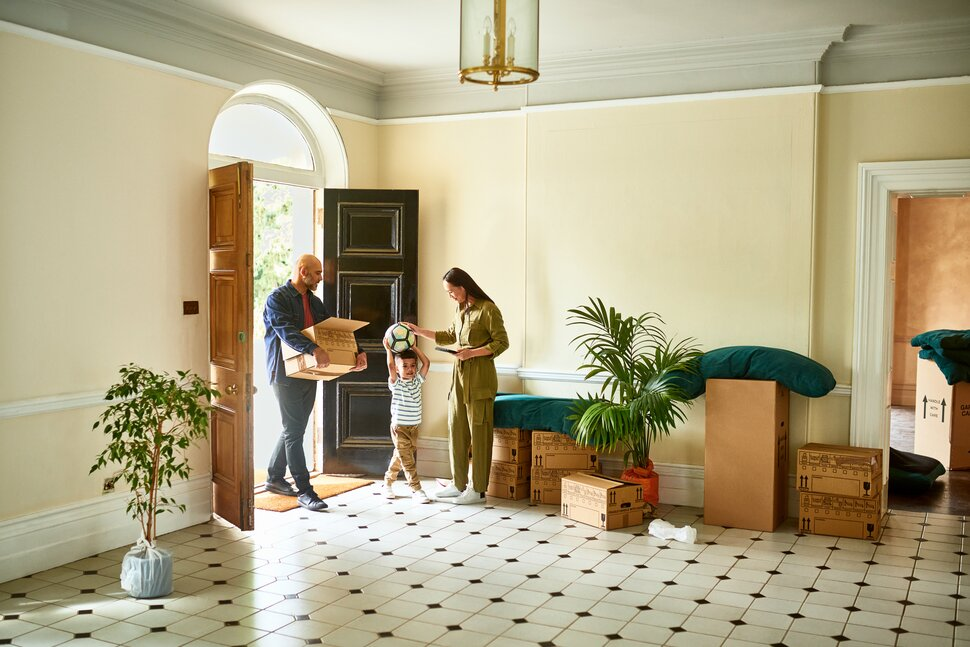

# 📋 Check list

# 1. 📊 Data Preprocessing

### 📈 Data Understanding
### ✅ Check for Dtypes
### ❌ Null Values
### ⛏️ Handle Outliers
### 🚫 Remove Duplicates
### 📊 Visualization 
### 🍬 Sampling
### 🔄 Attribute Transformation
### 📄 Normalization(Feature Selection)
### 🔑 Label Encoding
### 🔕 Dimension Reduction(PCA)
### ☝️ Feature subset selection
### 🖥️ Display Processed Data

# 2. 🚀 Models

### 🌲 Decision Tree Classifier
### ⏳ Naive Bayes Classifier
### 🤖 Support Vector Machine (SVM)
### 🍄 Random Forest Classifier
### 📢 K-Nearest Neighbors (KNN)
### 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import OneHotEncoder,BinaryEncoder

### Suppress warnings



In [2]:
# Suppress warnings and set display options
from warnings import filterwarnings
filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# Preprocessing


### 1. Data Understanding


In [3]:
# Load the dataset
df = pd.read_csv("Houses.csv")
display(df.head())   #default 5

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print(df.shape)

(1460, 81)


In [5]:
df.drop(["Id"], axis=1, inplace=True)


In [6]:
display(df.head())   #default 5

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 2. Check for Dtypes

In [7]:
pd.DataFrame({"Dtypes": df.dtypes, "Num_Uniq": df.nunique()}).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Dtypes,int64,object,float64,int64,object,object,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,object,int64,object,int64,int64,int64,object,object,object,object,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,object,int64,object,int64,object,object,float64,object,int64,int64,object,object,object,int64,int64,int64,int64,int64,int64,object,object,object,int64,int64,int64,object,object,int64
Num_Uniq,15,5,110,1073,2,2,4,4,2,5,3,25,9,8,5,8,10,9,112,61,6,8,15,16,3,327,4,5,6,4,4,4,6,637,6,144,780,721,6,5,2,5,753,417,24,861,4,3,4,3,8,4,4,12,7,4,5,6,97,3,5,441,5,5,3,274,202,120,20,76,8,3,4,4,21,12,5,9,6,663


In [8]:
cols_to_change = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
df[cols_to_change] = df[cols_to_change].astype("category")
pd.DataFrame({"Dtypes": df.dtypes, "Num_Uniq": df.nunique()}).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Dtypes,category,category,float64,int64,category,category,category,category,category,category,category,category,category,category,category,category,category,category,int64,int64,category,category,category,category,category,float64,category,category,category,category,category,category,category,int64,category,int64,int64,int64,category,category,category,category,int64,int64,int64,int64,category,category,category,category,category,category,category,int64,category,category,category,category,float64,category,category,int64,category,category,category,int64,int64,int64,int64,int64,category,category,category,category,int64,category,category,category,category,int64
Num_Uniq,15,5,110,1073,2,2,4,4,2,5,3,25,9,8,5,8,10,9,112,61,6,8,15,16,3,327,4,5,6,4,4,4,6,637,6,144,780,721,6,5,2,5,753,417,24,861,4,3,4,3,8,4,4,12,7,4,5,6,97,3,5,441,5,5,3,274,202,120,20,76,8,3,4,4,21,12,5,9,6,663


### 3. Null values

- **Check for Null Values**

In [9]:
null = df.isnull().sum()
null_ratio = null / df.shape[0]
pd.DataFrame({"Null": null, "Null_ratio": null_ratio}).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Null,0.0,0.0,259.000000,0.0,0.0,1369.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,872.00000,8.000000,0.0,0.0,0.0,37.000000,37.000000,38.000000,37.000000,0.0,38.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,690.000000,81.000000,81.000000,81.000000,0.0,0.0,81.000000,81.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1453.000000,1179.000000,1406.000000,0.0,0.0,0.0,0.0,0.0,0.0
Null_ratio,0.0,0.0,0.177397,0.0,0.0,0.937671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.59726,0.005479,0.0,0.0,0.0,0.025342,0.025342,0.026027,0.025342,0.0,0.026027,0.0,0.0,0.0,0.0,0.0,0.0,0.000685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.472603,0.055479,0.055479,0.055479,0.0,0.0,0.055479,0.055479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.995205,0.807534,0.963014,0.0,0.0,0.0,0.0,0.0,0.0


- **Drop Null values**

In [10]:
c1 = "MasVnrType MasVnrArea Electrical".split()
df.dropna(subset=c1, inplace=True)

- **Replace Null values**

-
    - Replace with Mode for categorical columns

In [11]:
c2 = "BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 GarageType GarageFinish GarageQual GarageCond".split()
modes = dict(df[c2].mode().iloc[0])

In [12]:
df.fillna(modes, inplace=True)

-
    - Replace with Median or Mean for numerical columns(due to distribution skewness)

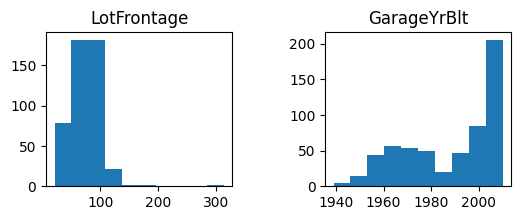

In [13]:
plt.figure(figsize=(6, 2))

plt.subplot(1, 2, 1)
plt.title("LotFrontage")
plt.hist(df["LotFrontage"])

plt.subplot(1, 2, 2)
plt.title("GarageYrBlt")
plt.hist(df["GarageYrBlt"])

plt.subplots_adjust(wspace=.5)
plt.show()

-
    - Replace with Median  for numerical columns(due to distribution skewness:left skew and right skew)

In [14]:
c2 = ["LotFrontage", "GarageYrBlt"]
medians = dict(df[c2].median())
medians

{'LotFrontage': np.float64(76.0), 'GarageYrBlt': np.float64(1995.5)}

In [15]:
df.fillna(medians, inplace=True)

- **Drop columns with high Null Ratio**

In [16]:
c3 = "Alley FireplaceQu PoolQC Fence MiscFeature".split()
df.drop(c3, axis=1, inplace=True)

- **Check for Null Values after handing Null values**

In [17]:
null = df.isnull().sum()
null_ratio = null / df.shape[0]
pd.DataFrame({"Null": null, "Null_ratio": null_ratio}).T

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 4. Handle Outliers

- **Numerical columns**

In [18]:
num_cols = df.select_dtypes("number").columns.tolist()

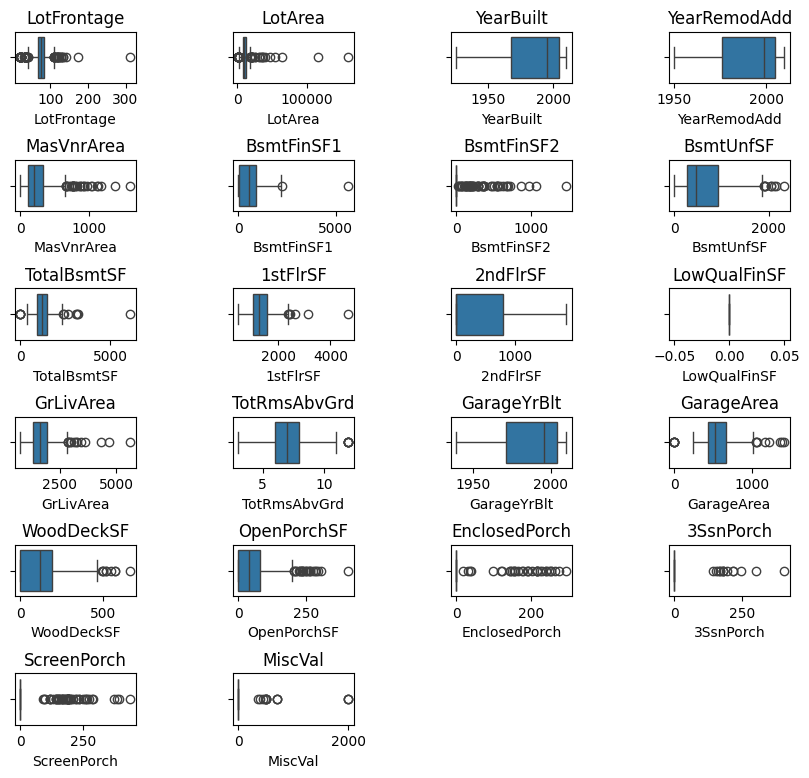

In [19]:
plt.figure(figsize=(10, 9))
for i, col in enumerate(num_cols[:-1]):
    plt.subplot(6, 4, i+1)
    plt.title(col)
    sns.boxplot(df[col], orient="h")
plt.subplots_adjust(wspace=.8, hspace=1.5)
plt.show()

In [20]:
for col in num_cols[:-1]:
    Q1 = np.quantile(df[col], .25)
    Q3 = np.quantile(df[col], .75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    upper_outliers = df[df[col] > upper][col].values
    lower_outliers = df[df[col] < lower][col].values    
    df[col].replace(upper_outliers, upper, inplace=True)
    df[col].replace(lower_outliers, lower, inplace=True)

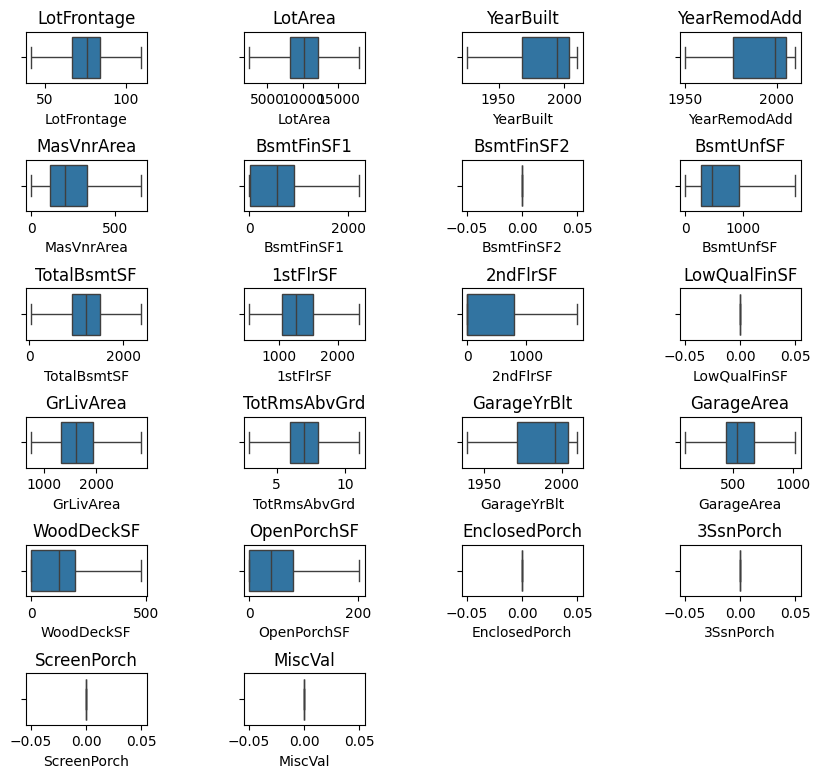

In [21]:
plt.figure(figsize=(10, 9))
for i, col in enumerate(num_cols[:-1]):
    plt.subplot(6, 4, i+1)
    plt.title(col)
    sns.boxplot(df[col], orient="h")
plt.subplots_adjust(wspace=.8, hspace=1.5)
plt.show()

- **Categorical columns**
    - replace the outlier categories (which are categories that rarely occur) with the mode.

In [22]:
cat_cols = df.select_dtypes("category").columns.tolist()

In [23]:
for col in cat_cols:
    mode = df[col].mode()[0]
    vc = df[col].value_counts()

    categories = vc.index.to_numpy()
    counts = vc.values

    outliers = categories[counts <= 10]

    df[col].replace(outliers, mode, inplace=True)

### 5. Remove Duplicates

In [24]:
df.duplicated().sum()

np.int64(0)

### 6. Visualization

In [25]:
num_cols = df.select_dtypes("number").columns.tolist()
cat_cols = df.select_dtypes("category").columns.tolist()

**Visualize couloums in numeric**

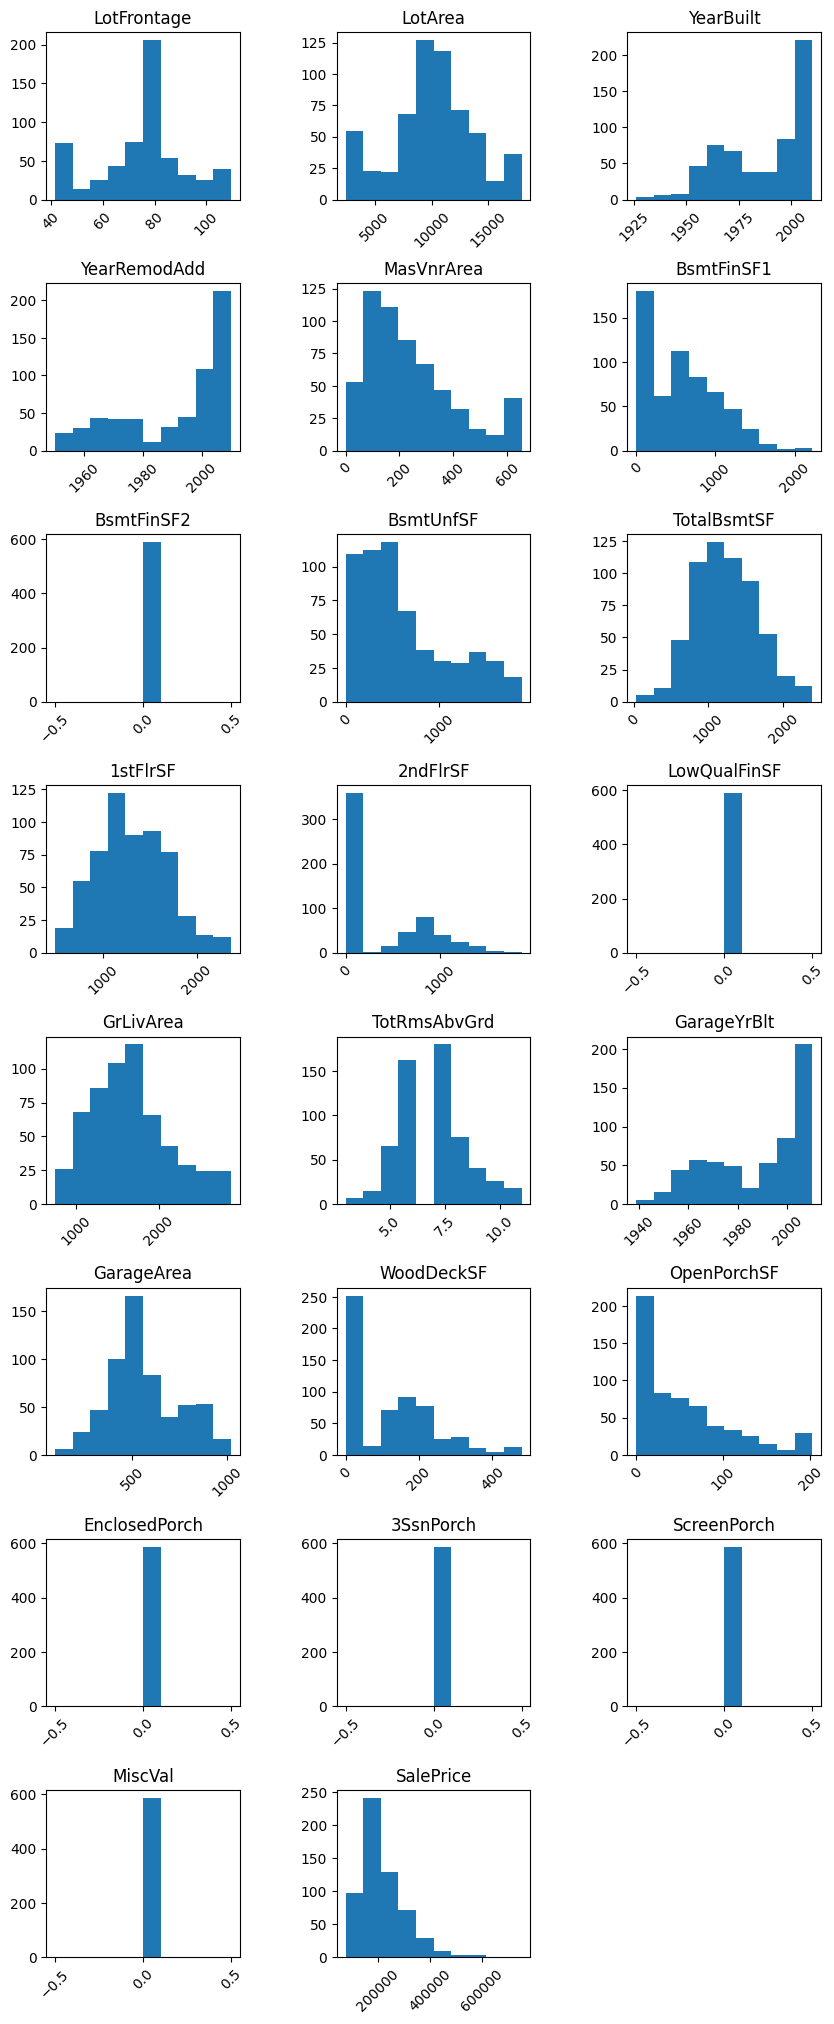

In [26]:
plt.figure(figsize=(10, 25))
for i, col in enumerate(num_cols):
    plt.subplot(8, 3, i+1)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.hist(df[col])
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

In [27]:
num_low_var_cols = ['LotArea', 'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']

**Visualize couloums in Category**

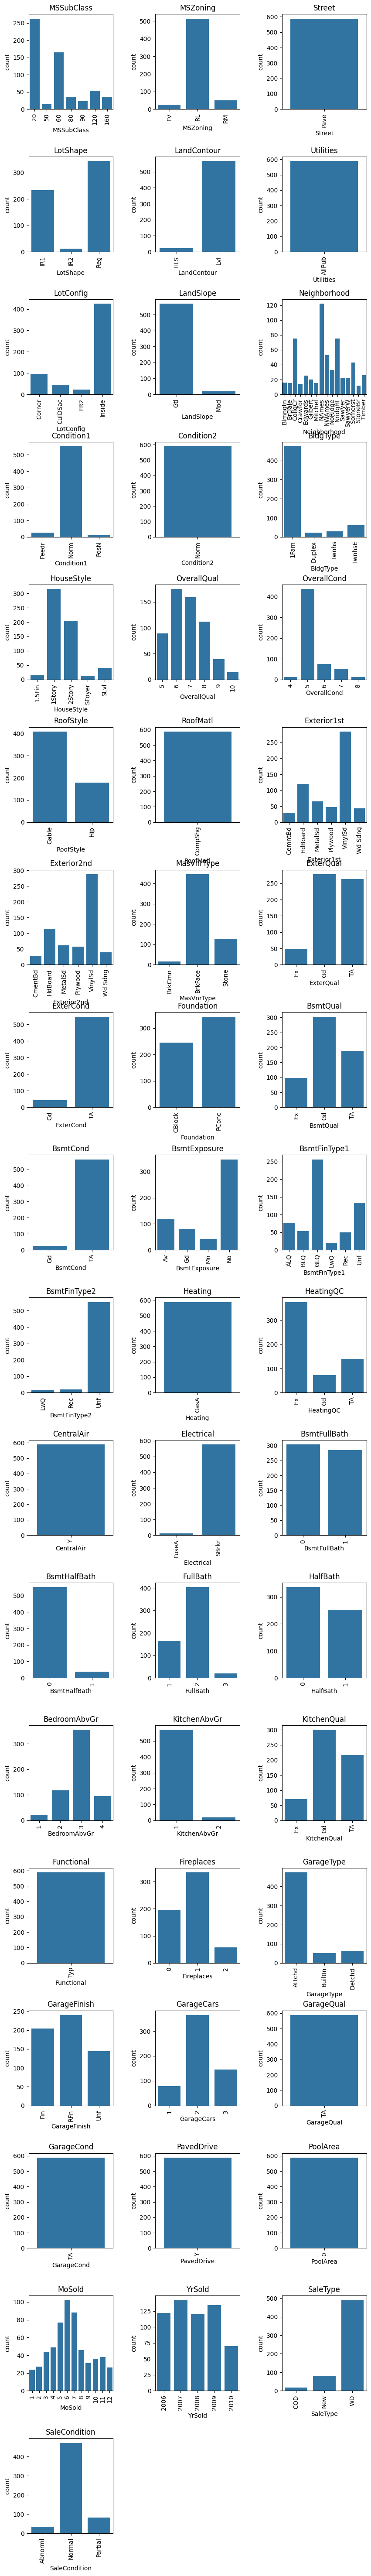

In [28]:
plt.figure(figsize=(10, 75))
for i, col in enumerate(cat_cols):
    plt.subplot(18, 3, i+1)
    plt.title(col)
    plt.xticks(rotation=90)
    sns.countplot(x=col, data=df)
plt.subplots_adjust(wspace=.5, hspace=.5)
plt.show()

In [29]:
cat_low_var_cols = ['MSSubClass', 'ExterCond', 'Street', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'SaleType', 'SaleCondition']

**Drop columns with low variance**

In [30]:
low_var_cols = num_low_var_cols + cat_low_var_cols
df.drop(low_var_cols, axis=1, inplace=True)

### 6. Sampling

In [31]:
# Perform random sampling to reduce the dataset to 80% of its original size
df = df.sample(frac=0.8, random_state=42)

### 7. Attribute Transformation

In [32]:
# Transform "YearBuilt" to represent the age of the house in years
df['HouseAge'] = 2024 - df['YearBuilt']

In [33]:
# Drop the original "YearBuilt" column to avoid redundancy
df.drop(columns=['YearBuilt'], inplace=True)

In [34]:
df

,MSZoning,LotFrontage,LotShape,LandContour,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,HouseAge
1290,RL,76.0,IR1,Lvl,Corner,NAmes,SLvl,5,7,1964,Hip,Wd Sdng,HdBoard,BrkFace,86.0,TA,PConc,TA,Av,GLQ,1014.0,138.0,1152.0,TA,1152,0,1152.0,1,1,0,3,TA,6,1,Attchd,1964.0,RFn,2,484,227,0.0,4,2010,180500,60
688,RL,60.0,Reg,HLS,Inside,StoneBr,1Story,8,6,2007,Gable,MetalSd,MetalSd,BrkFace,0.0,Gd,PConc,Gd,Av,GLQ,945.0,474.0,1419.0,Ex,1419,0,1419.0,1,2,0,2,Gd,7,1,Attchd,2007.0,RFn,2,567,140,0.0,10,2007,392000,17
1273,RL,109.5,IR1,Lvl,Corner,Edwards,SLvl,6,7,2006,Gable,Plywood,Plywood,BrkFace,84.0,TA,CBlock,TA,Av,ALQ,719.0,300.0,1019.0,Gd,1357,0,1357.0,1,1,0,2,Ex,5,1,Attchd,1959.0,RFn,1,312,0,0.0,5,2008,177000,65
796,RL,71.0,Reg,Lvl,Inside,Sawyer,1Story,6,5,1977,Gable,Plywood,Plywood,BrkFace,148.0,TA,CBlock,TA,No,Unf,0.0,660.0,660.0,Ex,1285,0,1285.0,0,1,1,3,TA,7,1,Attchd,1977.0,RFn,2,528,138,0.0,4,2007,143500,47
506,RL,80.0,IR1,Lvl,Inside,SawyerW,2Story,8,5,1994,Gable,VinylSd,VinylSd,BrkFace,125.0,Gd,PConc,Gd,No,GLQ,380.0,397.0,777.0,Ex,1065,846,1911.0,0,2,1,3,Gd,8,1,Attchd,1993.0,RFn,2,471,182,81.0,9,2006,215000,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,RL,68.0,IR1,Lvl,Inside,CollgCr,2Story,7,5,1999,Gable,VinylSd,VinylSd,BrkFace,158.0,Gd,PConc,Gd,No,GLQ,633.0,240.0,873.0,Ex,882,908,1790.0,1,2,1,3,Gd,7,0,Attchd,1999.0,RFn,2,588,0,88.0,6,2008,193000,25
1295,RL,70.0,Reg,Lvl,Inside,NAmes,1Story,5,5,1968,Hip,HdBoard,HdBoard,BrkFace,168.0,TA,CBlock,TA,Av,BLQ,1016.0,36.0,1052.0,Gd,1052,0,1052.0,1,1,1,3,TA,5,0,Attchd,1968.0,RFn,1,288,356,0.0,11,2006,138500,56
1043,RL,86.0,Reg,Lvl,Inside,SawyerW,2Story,7,5,1990,Hip,HdBoard,HdBoard,BrkFace,99.0,TA,PConc,Gd,No,GLQ,1085.0,390.0,1475.0,Ex,1532,797,2329.0,1,2,1,4,Gd,10,1,Attchd,1990.0,Unf,2,514,192,121.0,5,2008,262280,34
235,RM,41.5,Reg,Lvl,Inside,BrDale,2Story,6,5,1971,Gable,HdBoard,HdBoard,BrkFace,604.0,TA,CBlock,TA,No,ALQ,358.0,125.0,483.0,TA,483,504,987.0,0,1,1,2,TA,5,0,Detchd,1971.0,Unf,1,264,0,0.0,8,2008,89500,53


### 8. Data Splitting

In [35]:
bins = [0, 100000, 200000, 300000, 400000, 500000, float('inf')]
labels = ['<100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '>500k']
df['PriceCategory'] = pd.cut(df['SalePrice'], bins=bins, labels=labels)

In [36]:
# Prepare the data
X = df.drop(columns=['SalePrice', 'PriceCategory'])  # Drop target columns
y = df['PriceCategory']  # Extract the target column (price categories)

In [37]:
X

,MSZoning,LotFrontage,LotShape,LandContour,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,HouseAge
1290,RL,76.0,IR1,Lvl,Corner,NAmes,SLvl,5,7,1964,Hip,Wd Sdng,HdBoard,BrkFace,86.0,TA,PConc,TA,Av,GLQ,1014.0,138.0,1152.0,TA,1152,0,1152.0,1,1,0,3,TA,6,1,Attchd,1964.0,RFn,2,484,227,0.0,4,2010,60
688,RL,60.0,Reg,HLS,Inside,StoneBr,1Story,8,6,2007,Gable,MetalSd,MetalSd,BrkFace,0.0,Gd,PConc,Gd,Av,GLQ,945.0,474.0,1419.0,Ex,1419,0,1419.0,1,2,0,2,Gd,7,1,Attchd,2007.0,RFn,2,567,140,0.0,10,2007,17
1273,RL,109.5,IR1,Lvl,Corner,Edwards,SLvl,6,7,2006,Gable,Plywood,Plywood,BrkFace,84.0,TA,CBlock,TA,Av,ALQ,719.0,300.0,1019.0,Gd,1357,0,1357.0,1,1,0,2,Ex,5,1,Attchd,1959.0,RFn,1,312,0,0.0,5,2008,65
796,RL,71.0,Reg,Lvl,Inside,Sawyer,1Story,6,5,1977,Gable,Plywood,Plywood,BrkFace,148.0,TA,CBlock,TA,No,Unf,0.0,660.0,660.0,Ex,1285,0,1285.0,0,1,1,3,TA,7,1,Attchd,1977.0,RFn,2,528,138,0.0,4,2007,47
506,RL,80.0,IR1,Lvl,Inside,SawyerW,2Story,8,5,1994,Gable,VinylSd,VinylSd,BrkFace,125.0,Gd,PConc,Gd,No,GLQ,380.0,397.0,777.0,Ex,1065,846,1911.0,0,2,1,3,Gd,8,1,Attchd,1993.0,RFn,2,471,182,81.0,9,2006,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,RL,68.0,IR1,Lvl,Inside,CollgCr,2Story,7,5,1999,Gable,VinylSd,VinylSd,BrkFace,158.0,Gd,PConc,Gd,No,GLQ,633.0,240.0,873.0,Ex,882,908,1790.0,1,2,1,3,Gd,7,0,Attchd,1999.0,RFn,2,588,0,88.0,6,2008,25
1295,RL,70.0,Reg,Lvl,Inside,NAmes,1Story,5,5,1968,Hip,HdBoard,HdBoard,BrkFace,168.0,TA,CBlock,TA,Av,BLQ,1016.0,36.0,1052.0,Gd,1052,0,1052.0,1,1,1,3,TA,5,0,Attchd,1968.0,RFn,1,288,356,0.0,11,2006,56
1043,RL,86.0,Reg,Lvl,Inside,SawyerW,2Story,7,5,1990,Hip,HdBoard,HdBoard,BrkFace,99.0,TA,PConc,Gd,No,GLQ,1085.0,390.0,1475.0,Ex,1532,797,2329.0,1,2,1,4,Gd,10,1,Attchd,1990.0,Unf,2,514,192,121.0,5,2008,34
235,RM,41.5,Reg,Lvl,Inside,BrDale,2Story,6,5,1971,Gable,HdBoard,HdBoard,BrkFace,604.0,TA,CBlock,TA,No,ALQ,358.0,125.0,483.0,TA,483,504,987.0,0,1,1,2,TA,5,0,Detchd,1971.0,Unf,1,264,0,0.0,8,2008,53


In [38]:
y

1290    100k-200k
688     300k-400k
1273    100k-200k
796     100k-200k
506     200k-300k
          ...    
1366    100k-200k
1295    100k-200k
1043    200k-300k
235         <100k
545     200k-300k
Name: PriceCategory, Length: 470, dtype: category
Categories (6, object): ['<100k' < '100k-200k' < '200k-300k' < '300k-400k' < '400k-500k' < '>500k']

In [39]:
# Assuming y is your target DataFrame
y.to_csv("house_price.csv", index=False)  # Save as CSV

### 9. Feature Scalling(Normalization)

In [40]:
num_cols = X.select_dtypes("number").columns 
scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [41]:
# Use MinMaxScaler to scale numerical features between 0 and 1
X[num_cols]

,LotFrontage,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,HouseAge
1290,0.507353,0.233333,0.131498,0.456500,0.073200,0.475170,0.354531,0.000000,0.191083,0.375,0.352113,0.422414,0.472917,0.000000,0.547619
688,0.272059,0.950000,0.000000,0.425436,0.251426,0.588739,0.496025,0.000000,0.317056,0.500,0.957746,0.511853,0.291667,0.000000,0.035714
1273,1.000000,0.933333,0.128440,0.323692,0.159130,0.418598,0.463169,0.000000,0.287804,0.250,0.281690,0.237069,0.000000,0.000000,0.607143
796,0.433824,0.450000,0.226300,0.000000,0.350086,0.265897,0.425013,0.000000,0.253833,0.500,0.535211,0.469828,0.287500,0.000000,0.392857
506,0.566176,0.733333,0.191131,0.171075,0.210582,0.315664,0.308426,0.451923,0.549186,0.625,0.760563,0.408405,0.379167,0.400000,0.202381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,0.389706,0.816667,0.241590,0.284975,0.127304,0.356497,0.211447,0.485043,0.492097,0.500,0.845070,0.534483,0.000000,0.434568,0.130952
1295,0.419118,0.300000,0.256881,0.457400,0.019096,0.432635,0.301537,0.000000,0.143902,0.250,0.408451,0.211207,0.741667,0.000000,0.500000
1043,0.654412,0.666667,0.151376,0.488464,0.206869,0.612558,0.555909,0.425748,0.746402,0.875,0.718310,0.454741,0.400000,0.597531,0.238095
235,0.000000,0.350000,0.923547,0.161171,0.066304,0.190610,0.000000,0.269231,0.113234,0.250,0.450704,0.185345,0.000000,0.000000,0.464286


### 10. Encoding

- **Nominal/Ordinal filtering**

In [42]:
ordinal_cols = ['ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'Foundation', 'GarageType', 'GarageFinish']
pd.DataFrame(df[ordinal_cols].nunique()).T

,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,Foundation,GarageType,GarageFinish
0,3,3,4,6,3,3,2,3,3


In [43]:
nominal_cols = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType']
pd.DataFrame(df[nominal_cols].nunique()).T

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType
0,3,3,2,4,16,5,2,6,6,3


In [44]:
binary_cols = ['Neighborhood', 'HouseStyle', 'Exterior1st', 'Exterior2nd']
onehot_cols = ['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'RoofStyle', 'MasVnrType']

- **Ordinal Encoding**

In [45]:
labels = {
    'ExterQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},  
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},
    'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
    'HeatingQC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'KitchenQual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'Foundation': {'PConc': 4, 'CBlock': 3, 'BrkTil': 2, 'Slab': 1, 'Stone': 0},
    'GarageType': {'2Types': 6, 'Attchd': 5, 'Basment': 4, 'BuiltIn': 3, 'CarPort': 2, 'Detchd': 1, 'NA': 0},
    'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0}
}

In [46]:
for col in ordinal_cols:
    X[col] = X[col].map(labels[col])

- **Onehot Encoding**

In [47]:
onehot_encoder = OneHotEncoder(cols=onehot_cols)
X = onehot_encoder.fit_transform(X)

- **Binary Encoding**

In [48]:
binary_encoder = BinaryEncoder(cols=binary_cols)
X = binary_encoder.fit_transform(X)

In [49]:
X

,MSZoning_1,MSZoning_2,MSZoning_3,LotFrontage,LotShape_1,LotShape_2,LotShape_3,LandContour_1,LandContour_2,LotConfig_1,LotConfig_2,LotConfig_3,LotConfig_4,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,HouseStyle_0,HouseStyle_1,HouseStyle_2,OverallQual,OverallCond,YearRemodAdd,RoofStyle_1,RoofStyle_2,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,MasVnrType_1,MasVnrType_2,MasVnrType_3,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,HouseAge
1290,1,0,0,0.507353,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,5,7,0.233333,1,0,0,0,1,0,0,1,1,0,0,0.131498,2,4,3,3,6,0.456500,0.073200,0.475170,2,0.354531,0.000000,0.191083,1,1,0,3,2,0.375,1,5,0.352113,2,2,0.422414,0.472917,0.000000,4,2010,0.547619
688,1,0,0,0.272059,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,8,6,0.950000,0,1,0,1,0,0,1,0,1,0,0,0.000000,3,4,4,3,6,0.425436,0.251426,0.588739,4,0.496025,0.000000,0.317056,1,2,0,2,3,0.500,1,5,0.957746,2,2,0.511853,0.291667,0.000000,10,2007,0.035714
1273,1,0,0,1.000000,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,6,7,0.933333,0,1,0,1,1,0,1,1,1,0,0,0.128440,2,3,3,3,5,0.323692,0.159130,0.418598,3,0.463169,0.000000,0.287804,1,1,0,2,4,0.250,1,5,0.281690,2,1,0.237069,0.000000,0.000000,5,2008,0.607143
796,1,0,0,0.433824,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,6,5,0.450000,0,1,0,1,1,0,1,1,1,0,0,0.226300,2,3,3,1,1,0.000000,0.350086,0.265897,4,0.425013,0.000000,0.253833,0,1,1,3,2,0.500,1,5,0.535211,2,2,0.469828,0.287500,0.000000,4,2007,0.392857
506,1,0,0,0.566176,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,8,5,0.733333,0,1,1,0,0,1,0,0,1,0,0,0.191131,3,4,4,1,6,0.171075,0.210582,0.315664,4,0.308426,0.451923,0.549186,0,2,1,3,3,0.625,1,5,0.760563,2,2,0.408405,0.379167,0.400000,9,2006,0.202381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,1,0,0,0.389706,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,1,1,7,5,0.816667,0,1,1,0,0,1,0,0,1,0,0,0.241590,3,4,4,1,6,0.284975,0.127304,0.356497,4,0.211447,0.485043,0.492097,1,2,1,3,3,0.500,0,5,0.845070,2,2,0.534483,0.000000,0.434568,6,2008,0.130952
1295,1,0,0,0.419118,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,5,5,0.300000,1,0,1,0,1,0,0,1,1,0,0,0.256881,2,3,3,3,4,0.457400,0.019096,0.432635,3,0.301537,0.000000,0.143902,1,1,1,3,2,0.250,0,5,0.408451,2,1,0.211207,0.741667,0.000000,11,2006,0.500000
1043,1,0,0,0.654412,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,7,5,0.666667,1,0,1,0,1,0,0,1,1,0,0,0.151376,2,4,4,1,6,0.488464,0.206869,0.612558,4,0.555909,0.425748,0.746402,1,2,1,4,3,0.875,1,5,0.718310,1,2,0.454741,0.400000,0.597531,5,2008,0.238095
235,0,1,0,0.000000,0,1,0,1,0,0,1,0,0,0,1,1,1,1,0,1,1,6,5,0.350000,0,1,1,0,1,0,0,1,1,0,0,0.923547,2,3,3,1,5,0.161171,0.066304,0.190610,2,0.000000,0.269231,0.113234,0,1,1,2,2,0.250,0,1,0.450704,1,1,0.185345,0.000000,0.000000,8,2008,0.464286


### 11. Dimension Reduction


In [50]:
# Use PCA to reduce dimensions to 10 principal components
pca = PCA(n_components=10)
pca_features = pca.fit_transform(X[num_cols])

In [51]:
# Create a new DataFrame for PCA features
pca_df = pd.DataFrame(pca_features, columns=[f'PCA_{i+1}' for i in range(10)])

# Add PCA features back to the dataset
X = pd.concat([X.reset_index(drop=True), pca_df], axis=1)


In [52]:
X

,MSZoning_1,MSZoning_2,MSZoning_3,LotFrontage,LotShape_1,LotShape_2,LotShape_3,LandContour_1,LandContour_2,LotConfig_1,LotConfig_2,LotConfig_3,LotConfig_4,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,HouseStyle_0,HouseStyle_1,HouseStyle_2,OverallQual,OverallCond,YearRemodAdd,RoofStyle_1,RoofStyle_2,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,MasVnrType_1,MasVnrType_2,MasVnrType_3,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,HouseAge,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
0,1,0,0,0.507353,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,5,7,0.233333,1,0,0,0,1,0,0,1,1,0,0,0.131498,2,4,3,3,6,0.456500,0.073200,0.475170,2,0.354531,0.000000,0.191083,1,1,0,3,2,0.375,1,5,0.352113,2,2,0.422414,0.472917,0.000000,4,2010,0.547619,-0.680760,-0.096487,-0.117001,0.400599,-0.144940,0.245338,-0.087448,-0.036708,-0.146309,0.064363
1,1,0,0,0.272059,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,8,6,0.950000,0,1,0,1,0,0,1,0,1,0,0,0.000000,3,4,4,3,6,0.425436,0.251426,0.588739,4,0.496025,0.000000,0.317056,1,2,0,2,3,0.500,1,5,0.957746,2,2,0.511853,0.291667,0.000000,10,2007,0.035714,0.152872,0.590197,-0.000420,0.217509,-0.146898,0.013702,-0.227573,-0.232509,-0.028516,-0.030651
2,1,0,0,1.000000,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,6,7,0.933333,0,1,0,1,1,0,1,1,1,0,0,0.128440,2,3,3,3,5,0.323692,0.159130,0.418598,3,0.463169,0.000000,0.287804,1,1,0,2,4,0.250,1,5,0.281690,2,1,0.237069,0.000000,0.000000,5,2008,0.607143,-0.479135,0.007360,-0.238639,0.183412,0.059167,-0.060177,-0.492547,0.341512,0.516101,-0.124890
3,1,0,0,0.433824,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,6,5,0.450000,0,1,0,1,1,0,1,1,1,0,0,0.226300,2,3,3,1,1,0.000000,0.350086,0.265897,4,0.425013,0.000000,0.253833,0,1,1,3,2,0.500,1,5,0.535211,2,2,0.469828,0.287500,0.000000,4,2007,0.392857,-0.434615,0.078086,-0.141396,-0.136506,-0.211818,0.102753,-0.039486,0.016856,-0.022303,0.132907
4,1,0,0,0.566176,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,8,5,0.733333,0,1,1,0,0,1,0,0,1,0,0,0.191131,3,4,4,1,6,0.171075,0.210582,0.315664,4,0.308426,0.451923,0.549186,0,2,1,3,3,0.625,1,5,0.760563,2,2,0.408405,0.379167,0.400000,9,2006,0.202381,0.101607,-0.064831,0.368524,-0.135213,-0.013759,0.257207,-0.196581,0.053601,-0.013666,-0.088477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,1,0,0,0.389706,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,1,1,7,5,0.816667,0,1,1,0,0,1,0,0,1,0,0,0.241590,3,4,4,1,6,0.284975,0.127304,0.356497,4,0.211447,0.485043,0.492097,1,2,1,3,3,0.500,0,5,0.845070,2,2,0.534483,0.000000,0.434568,6,2008,0.130952,0.100913,0.111811,0.513256,-0.140278,0.201986,-0.107120,-0.189700,-0.015332,-0.065365,0.003557
466,1,0,0,0.419118,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,5,5,0.300000,1,0,1,0,1,0,0,1,1,0,0,0.256881,2,3,3,3,4,0.457400,0.019096,0.432635,3,0.301537,0.000000,0.143902,1,1,1,3,2,0.250,0,5,0.408451,2,1,0.211207,0.741667,0.000000,11,2006,0.500000,-0.689861,0.020971,0.015169,0.504717,-0.278245,0.395680,0.144751,0.078476,-0.102496,-0.084456
467,1,0,0,0.654412,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,7,5,0.666667,1,0,1,0,1,0,0,1,1,0,0,0.151376,2,4,4,1,6,0.488464,0.206869,0.612558,4,0.555909,0.425748,0.746402,1,2,1,4,3,0.875,1,5,0.718310,1,2,0.454741,0.400000,0.597531,5,2008,0.238095,0.365592,-0.365511,0.192782,0.118995,0.183602,0.317138,-0.271996,-0.241975,-0.017701,-0.190801
468,0,1,0,0.000000,0,1,0,1,0,0,1,0,0,0,1,1,1,1,0,1,1,6,5,0.350000,0,1,1,0,1,0,0,1,1,0,0,0.923547,2,3,3,1,5,0.161171,0.066304,0.190610,2,0.000000,0.269231,0.113234,0,1,1,2,2,0.250,0,1,0.450704,

### 12. Feature Subset Selection


In [53]:
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
X = X[selected_features.to_list()]

In [54]:
X

,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,GrLivArea,KitchenQual,GarageCars,GarageArea,HouseAge,PCA_1
0,5,2,3,0.475170,0.191083,2,2,0.422414,0.547619,-0.680760
1,8,3,4,0.588739,0.317056,3,2,0.511853,0.035714,0.152872
2,6,2,3,0.418598,0.287804,4,1,0.237069,0.607143,-0.479135
3,6,2,3,0.265897,0.253833,2,2,0.469828,0.392857,-0.434615
4,8,3,4,0.315664,0.549186,3,2,0.408405,0.202381,0.101607
...,...,...,...,...,...,...,...,...,...,...
465,7,3,4,0.356497,0.492097,3,2,0.534483,0.130952,0.100913
466,5,2,3,0.432635,0.143902,2,1,0.211207,0.500000,-0.689861
467,7,2,4,0.612558,0.746402,3,2,0.454741,0.238095,0.365592
468,6,2,3,0.190610,0.113234,2,1,0.185345,0.464286,-0.826563


### 13. Display processed data

In [55]:
# Display processed data
X_df = pd.DataFrame(X, columns=X.columns)  # Convert array back to DataFrame with feature names
print("Selected Features DataFrame:")
display(X_df)


Selected Features DataFrame:


,OverallQual,ExterQual,BsmtQual,TotalBsmtSF,GrLivArea,KitchenQual,GarageCars,GarageArea,HouseAge,PCA_1
0,5,2,3,0.475170,0.191083,2,2,0.422414,0.547619,-0.680760
1,8,3,4,0.588739,0.317056,3,2,0.511853,0.035714,0.152872
2,6,2,3,0.418598,0.287804,4,1,0.237069,0.607143,-0.479135
3,6,2,3,0.265897,0.253833,2,2,0.469828,0.392857,-0.434615
4,8,3,4,0.315664,0.549186,3,2,0.408405,0.202381,0.101607
...,...,...,...,...,...,...,...,...,...,...
465,7,3,4,0.356497,0.492097,3,2,0.534483,0.130952,0.100913
466,5,2,3,0.432635,0.143902,2,1,0.211207,0.500000,-0.689861
467,7,2,4,0.612558,0.746402,3,2,0.454741,0.238095,0.365592
468,6,2,3,0.190610,0.113234,2,1,0.185345,0.464286,-0.826563


In [56]:
# Assuming X_df is your preprocessed DataFrame
X_df.to_csv("X_df.csv", index=False)  # Save as CSV

# Models(Classification:Descion tree,Naive bayes ...............)

###  Split the data into training and testing sets


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,classification_report,mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 1. Decision Tree Classifier



Predictions from Decision Tree Classifier (y_pred_dt):
['<100k' '100k-200k' '100k-200k' '100k-200k' '100k-200k' '<100k'
 '200k-300k' '100k-200k' '400k-500k' '100k-200k' '200k-300k' '100k-200k'
 '200k-300k' '100k-200k' '100k-200k' '200k-300k' '200k-300k' '100k-200k'
 '200k-300k' '<100k' '100k-200k' '200k-300k' '300k-400k' '200k-300k'
 '100k-200k' '200k-300k' '100k-200k' '200k-300k' '>500k' '200k-300k'
 '100k-200k' '200k-300k' '100k-200k' '200k-300k' '200k-300k' '300k-400k'
 '200k-300k' '200k-300k' '100k-200k' '<100k' '100k-200k' '200k-300k'
 '100k-200k' '200k-300k' '100k-200k' '100k-200k' '200k-300k' '200k-300k'
 '100k-200k' '100k-200k' '100k-200k' '100k-200k' '100k-200k' '200k-300k'
 '100k-200k' '100k-200k' '300k-400k' '<100k' '200k-300k' '200k-300k'
 '100k-200k' '100k-200k' '100k-200k' '100k-200k' '100k-200k' '100k-200k'
 '100k-200k' '100k-200k' '200k-300k' '<100k' '100k-200k' '100k-200k'
 '200k-300k' '300k-400k' '200k-300k' '200k-300k' '100k-200k' '200k-300k'
 '100k-200k' '100k-200k'

,Metric,Decision Tree
0,Accuracy,65.957447
1,Recall,56.633142
2,Precision,43.249701
3,F1 Score,47.367642


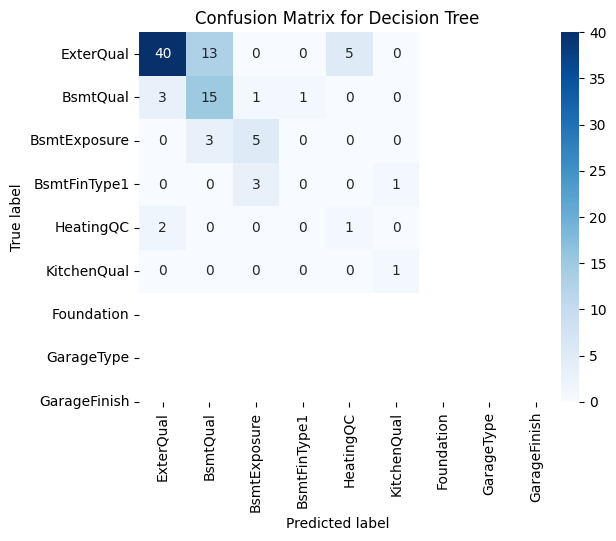

In [59]:
# Initialize the classifier model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict the target variable
y_pred_dt = dt_model.predict(X_test)

# Print the predicted values
print("Predictions from Decision Tree Classifier (y_pred_dt):")
print(y_pred_dt)

###################################################################################################
# Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt) * 100
recall_dt = recall_score(y_test, y_pred_dt, average='macro') * 100
precision_dt = precision_score(y_test, y_pred_dt, average='macro') * 100
f1_dt = f1_score(y_test, y_pred_dt, average='macro') * 100

# Create a DataFrame to display the metrics
metrics_data = {
    "Metric": ["Accuracy", "Recall", "Precision", "F1 Score"],
    "Decision Tree": [accuracy_dt, recall_dt, precision_dt, f1_dt]}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the results in DataFrame
display(metrics_df)

###################################################################################################
# Confusion Matrix visualization
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix for Decision Tree")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

In [60]:
report_dict = classification_report(y_test, y_pred_dt, output_dict=True)
# Convert to DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Display the DataFrame
print("Classification Report as DataFrame:")
display(report_df)

Classification Report as DataFrame:


,precision,recall,f1-score,support
100k-200k,0.888889,0.689655,0.776699,58.000000
200k-300k,0.483871,0.750000,0.588235,20.000000
300k-400k,0.555556,0.625000,0.588235,8.000000
400k-500k,0.000000,0.000000,0.000000,4.000000
<100k,0.166667,0.333333,0.222222,3.000000
>500k,0.500000,1.000000,0.666667,1.000000
accuracy,0.659574,0.659574,0.659574,0.659574
macro avg,0.432497,0.566331,0.473676,94.000000
weighted avg,0.709334,0.659574,0.668643,94.000000


### 2. Naive Bayes Classifier





Predictions from Naive Bayes (y_pred_nb):
['<100k' '200k-300k' '100k-200k' '100k-200k' '<100k' '<100k' '200k-300k'
 '<100k' '400k-500k' '<100k' '200k-300k' '200k-300k' '100k-200k'
 '200k-300k' '100k-200k' '200k-300k' '300k-400k' '<100k' '100k-200k'
 '<100k' '<100k' '200k-300k' '400k-500k' '200k-300k' '100k-200k'
 '200k-300k' '<100k' '200k-300k' '400k-500k' '200k-300k' '<100k'
 '200k-300k' '100k-200k' '200k-300k' '100k-200k' '400k-500k' '200k-300k'
 '300k-400k' '200k-300k' '<100k' '100k-200k' '100k-200k' '<100k'
 '100k-200k' '<100k' '100k-200k' '200k-300k' '200k-300k' '<100k' '<100k'
 '<100k' '<100k' '<100k' '200k-300k' '<100k' '<100k' '300k-400k'
 '100k-200k' '<100k' '200k-300k' '200k-300k' '100k-200k' '100k-200k'
 '<100k' '100k-200k' '100k-200k' '<100k' '<100k' '200k-300k' '100k-200k'
 '<100k' '100k-200k' '300k-400k' '400k-500k' '200k-300k' '200k-300k'
 '<100k' '200k-300k' '<100k' '<100k' '400k-500k' '<100k' '300k-400k'
 '400k-500k' '100k-200k' '200k-300k' '200k-300k' '<100k' '200k-30

,Metric,Naive Bayes
0,Accuracy,42.553191
1,Recall,46.839080
2,Precision,34.955815
3,F1 Score,31.155026


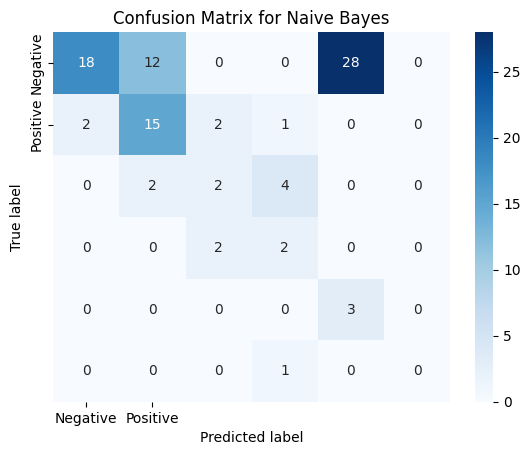

In [61]:
# Initialize the model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predict the target variable
y_pred_nb = nb_model.predict(X_test)


# Print the predicted values for Naive Bayes
print("Predictions from Naive Bayes (y_pred_nb):")
print(y_pred_nb)


# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)*100
recall_nb = recall_score(y_test, y_pred_nb,average='macro')*100
precision_nb = precision_score(y_test, y_pred_nb,average='macro')*100
f1_nb = f1_score(y_test, y_pred_nb,average='macro')*100

# Create a DataFrame to display the metrics
metrics_data = {
    "Metric": ["Accuracy", "Recall", "Precision", "F1 Score"],
    "Naive Bayes": [accuracy_nb, recall_nb, precision_nb, f1_nb]}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the results in DataFrame
display(metrics_df)

# Confusion Matrix visualization
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix for Naive Bayes")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


In [62]:
report_dict = classification_report(y_test, y_pred_nb, output_dict=True)
# Convert to DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Display the DataFrame
print("Classification Report as DataFrame:")
display(report_df)

Classification Report as DataFrame:


,precision,recall,f1-score,support
100k-200k,0.900000,0.310345,0.461538,58.000000
200k-300k,0.517241,0.750000,0.612245,20.000000
300k-400k,0.333333,0.250000,0.285714,8.000000
400k-500k,0.250000,0.500000,0.333333,4.000000
<100k,0.096774,1.000000,0.176471,3.000000
>500k,0.000000,0.000000,0.000000,1.000000
accuracy,0.425532,0.425532,0.425532,0.425532
macro avg,0.349558,0.468391,0.311550,94.000000
weighted avg,0.707466,0.425532,0.459176,94.000000


### 3. Support Vector Machine (SVM)




Predictions from Support Vector Machine (SVM):
['100k-200k' '200k-300k' '100k-200k' '100k-200k' '100k-200k' '100k-200k'
 '200k-300k' '100k-200k' '300k-400k' '100k-200k' '200k-300k' '200k-300k'
 '100k-200k' '200k-300k' '100k-200k' '100k-200k' '200k-300k' '100k-200k'
 '100k-200k' '100k-200k' '100k-200k' '200k-300k' '300k-400k' '200k-300k'
 '100k-200k' '200k-300k' '100k-200k' '200k-300k' '300k-400k' '200k-300k'
 '100k-200k' '200k-300k' '100k-200k' '200k-300k' '100k-200k' '300k-400k'
 '200k-300k' '200k-300k' '200k-300k' '100k-200k' '100k-200k' '200k-300k'
 '100k-200k' '100k-200k' '100k-200k' '100k-200k' '200k-300k' '200k-300k'
 '100k-200k' '100k-200k' '100k-200k' '100k-200k' '100k-200k' '200k-300k'
 '100k-200k' '100k-200k' '200k-300k' '100k-200k' '100k-200k' '200k-300k'
 '200k-300k' '100k-200k' '100k-200k' '100k-200k' '100k-200k' '100k-200k'
 '100k-200k' '100k-200k' '200k-300k' '100k-200k' '100k-200k' '100k-200k'
 '200k-300k' '300k-400k' '200k-300k' '200k-300k' '100k-200k' '200k-300k'
 '10

,Metric,Support vector machine(SVM)
0,Accuracy,70.212766
1,Recall,70.212766
2,Precision,68.850486
3,F1 Score,68.469088


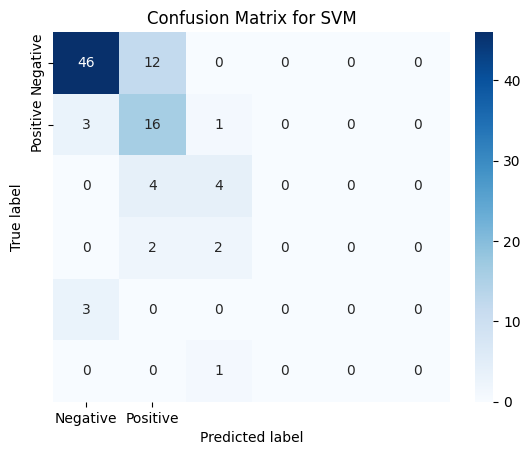

In [63]:
from sklearn.svm import SVC

# Initialize the model
svm_model = SVC(random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predict the target variable
y_pred_svm = svm_model.predict(X_test)

# Print the predicted values for Support Vector Machine (SVM)
print("Predictions from Support Vector Machine (SVM):")
print(y_pred_svm)

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm) *100
recall_svm = recall_score(y_test, y_pred_svm,average='weighted') * 100
precision_svm = precision_score(y_test, y_pred_svm,average='weighted') * 100
f1_svm = f1_score(y_test, y_pred_svm,average='weighted') * 100

# Create a DataFrame to display the metrics
metrics_data = {
    "Metric": ["Accuracy", "Recall", "Precision", "F1 Score"],
    "Support vector machine(SVM)": [accuracy_svm, recall_svm, precision_svm, f1_svm]}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_data)
# Display the results in DataFrame
display(metrics_df)

# Confusion Matrix visualization
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix for SVM")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


In [64]:
report_dict = classification_report(y_test, y_pred_svm, output_dict=True)
# Convert to DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Display the DataFrame
print("Classification Report as DataFrame:")
display(report_df)

Classification Report as DataFrame:


,precision,recall,f1-score,support
100k-200k,0.884615,0.793103,0.836364,58.000000
200k-300k,0.470588,0.800000,0.592593,20.000000
300k-400k,0.500000,0.500000,0.500000,8.000000
400k-500k,0.000000,0.000000,0.000000,4.000000
<100k,0.000000,0.000000,0.000000,3.000000
>500k,0.000000,0.000000,0.000000,1.000000
accuracy,0.702128,0.702128,0.702128,0.702128
macro avg,0.309201,0.348851,0.321493,94.000000
weighted avg,0.688505,0.702128,0.684691,94.000000


### 4. Random Forest Classifier



Predictions from Random Forest Classifier:
['100k-200k' '100k-200k' '100k-200k' '100k-200k' '100k-200k' '100k-200k'
 '200k-300k' '100k-200k' '300k-400k' '100k-200k' '200k-300k' '100k-200k'
 '200k-300k' '200k-300k' '100k-200k' '100k-200k' '200k-300k' '100k-200k'
 '200k-300k' '100k-200k' '100k-200k' '200k-300k' '300k-400k' '100k-200k'
 '100k-200k' '200k-300k' '100k-200k' '200k-300k' '>500k' '200k-300k'
 '100k-200k' '200k-300k' '100k-200k' '200k-300k' '200k-300k' '300k-400k'
 '200k-300k' '200k-300k' '100k-200k' '100k-200k' '100k-200k' '200k-300k'
 '100k-200k' '200k-300k' '100k-200k' '100k-200k' '200k-300k' '200k-300k'
 '100k-200k' '100k-200k' '100k-200k' '100k-200k' '100k-200k' '200k-300k'
 '100k-200k' '100k-200k' '300k-400k' '<100k' '100k-200k' '200k-300k'
 '200k-300k' '100k-200k' '100k-200k' '100k-200k' '100k-200k' '100k-200k'
 '100k-200k' '100k-200k' '200k-300k' '100k-200k' '100k-200k' '100k-200k'
 '200k-300k' '300k-400k' '200k-300k' '200k-300k' '100k-200k' '200k-300k'
 '100k-200k' '10

,Metric,Random Forest Classifier
0,Accuracy,74.468085
1,Recall,74.468085
2,Precision,73.145117
3,F1 Score,72.987320


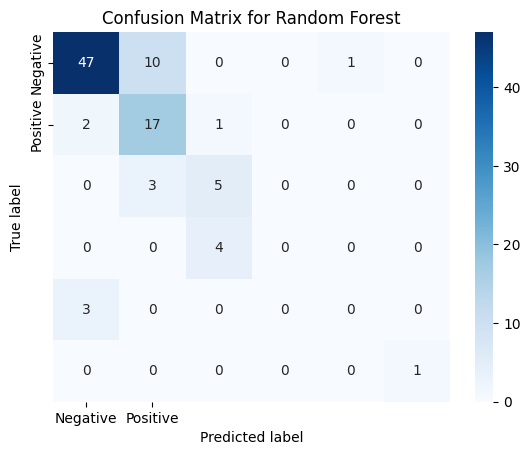

In [65]:
# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict the target variable
y_pred_rf = rf_model.predict(X_test)

# Print the predicted values for Random Forest Classifier
print("Predictions from Random Forest Classifier:")
print(y_pred_rf)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
recall_rf = recall_score(y_test, y_pred_rf,average='weighted') * 100
precision_rf = precision_score(y_test, y_pred_rf,average='weighted') * 100
f1_rf = f1_score(y_test, y_pred_rf,average='weighted') * 100

# Create a DataFrame to display the metrics
metrics_data = {
    "Metric": ["Accuracy", "Recall", "Precision", "F1 Score"],
    "Random Forest Classifier": [accuracy_rf, recall_rf, precision_rf, f1_rf]}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_data)
# Display the results in DataFrame
display(metrics_df)

# Confusion Matrix visualization
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix for Random Forest")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


In [66]:
report_dict = classification_report(y_test, y_pred_rf, output_dict=True)
# Convert to DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Display the DataFrame
print("Classification Report as DataFrame:")
display(report_df)

Classification Report as DataFrame:


,precision,recall,f1-score,support
100k-200k,0.903846,0.810345,0.854545,58.000000
200k-300k,0.566667,0.850000,0.680000,20.000000
300k-400k,0.500000,0.625000,0.555556,8.000000
400k-500k,0.000000,0.000000,0.000000,4.000000
<100k,0.000000,0.000000,0.000000,3.000000
>500k,1.000000,1.000000,1.000000,1.000000
accuracy,0.744681,0.744681,0.744681,0.744681
macro avg,0.495085,0.547557,0.515017,94.000000
weighted avg,0.731451,0.744681,0.729873,94.000000


### 5. K-Nearest Neighbors (KNN)



Predictions from K-Nearest Neighbors (KNN):
['100k-200k' '100k-200k' '100k-200k' '100k-200k' '100k-200k' '<100k'
 '200k-300k' '100k-200k' '300k-400k' '100k-200k' '200k-300k' '200k-300k'
 '100k-200k' '200k-300k' '100k-200k' '100k-200k' '200k-300k' '100k-200k'
 '100k-200k' '100k-200k' '100k-200k' '200k-300k' '200k-300k' '200k-300k'
 '100k-200k' '300k-400k' '100k-200k' '200k-300k' '300k-400k' '200k-300k'
 '100k-200k' '200k-300k' '100k-200k' '200k-300k' '100k-200k' '300k-400k'
 '200k-300k' '300k-400k' '100k-200k' '100k-200k' '100k-200k' '200k-300k'
 '100k-200k' '100k-200k' '100k-200k' '100k-200k' '200k-300k' '200k-300k'
 '100k-200k' '100k-200k' '100k-200k' '100k-200k' '100k-200k' '300k-400k'
 '100k-200k' '100k-200k' '300k-400k' '100k-200k' '100k-200k' '200k-300k'
 '200k-300k' '100k-200k' '100k-200k' '100k-200k' '100k-200k' '100k-200k'
 '100k-200k' '100k-200k' '200k-300k' '100k-200k' '100k-200k' '100k-200k'
 '300k-400k' '300k-400k' '200k-300k' '200k-300k' '100k-200k' '200k-300k'
 '100k-200k

,Metric,K-Nearest Neighbors (KNN)
0,Accuracy,70.212766
1,Recall,70.212766
2,Precision,72.244521
3,F1 Score,69.961521


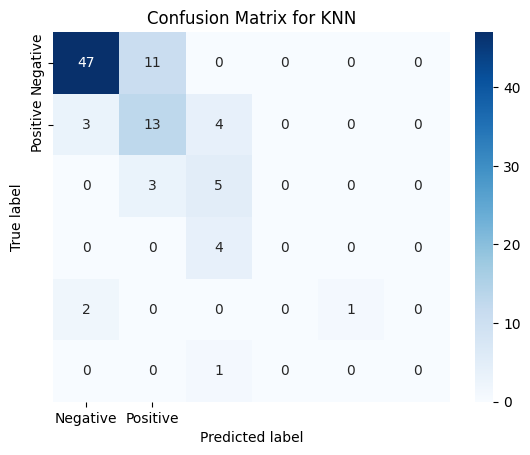

In [67]:
# Initialize the model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Predict the target variable
y_pred_knn = knn_model.predict(X_test)

# Print the predicted values for K-Nearest Neighbors (KNN)
print("Predictions from K-Nearest Neighbors (KNN):")
print(y_pred_knn)

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn) * 100
recall_knn = recall_score(y_test, y_pred_knn,average='weighted') * 100
precision_knn = precision_score(y_test, y_pred_knn,average='weighted') * 100
f1_knn = f1_score(y_test, y_pred_knn,average='weighted') * 100

# Create a DataFrame to display the metrics
metrics_data = {
    "Metric": ["Accuracy", "Recall", "Precision", "F1 Score"],
    "K-Nearest Neighbors (KNN)": [accuracy_knn, recall_knn, precision_knn, f1_knn]}

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_data)
# Display the results in DataFrame
display(metrics_df)

# Confusion Matrix visualization
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix for KNN")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()


In [68]:
report_dict = classification_report(y_test, y_pred_knn, output_dict=True)
# Convert to DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Display the DataFrame
print("Classification Report as DataFrame:")
display(report_df)

Classification Report as DataFrame:


,precision,recall,f1-score,support
100k-200k,0.903846,0.810345,0.854545,58.000000
200k-300k,0.481481,0.650000,0.553191,20.000000
300k-400k,0.357143,0.625000,0.454545,8.000000
400k-500k,0.000000,0.000000,0.000000,4.000000
<100k,1.000000,0.333333,0.500000,3.000000
>500k,0.000000,0.000000,0.000000,1.000000
accuracy,0.702128,0.702128,0.702128,0.702128
macro avg,0.457078,0.403113,0.393714,94.000000
weighted avg,0.722445,0.702128,0.699615,94.000000


# Confusion Matrix of all Models

In [69]:
# Create a DataFrame to display the metrics
metrics_data = {
    "Metric": ["Accuracy", "Recall", "Precision", "F1 Score"],
    "Decision Tree": [accuracy_dt, recall_dt, precision_dt, f1_dt],
     "Naive Bayes": [accuracy_nb, recall_nb, precision_nb, f1_nb],
    "Support vector machine(SVM)": [accuracy_svm, recall_svm, precision_svm, f1_svm],
    "Random Forest Classifier": [accuracy_rf, recall_rf, precision_rf, f1_rf],
    "K-Nearest Neighbors (KNN)": [accuracy_knn, recall_knn, precision_knn, f1_knn]
    }

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Display the results in DataFrame
display(metrics_df)

,Metric,Decision Tree,Naive Bayes,Support vector machine(SVM),Random Forest Classifier,K-Nearest Neighbors (KNN)
0,Accuracy,65.957447,42.553191,70.212766,74.468085,70.212766
1,Recall,56.633142,46.839080,70.212766,74.468085,70.212766
2,Precision,43.249701,34.955815,68.850486,73.145117,72.244521
3,F1 Score,47.367642,31.155026,68.469088,72.987320,69.961521


### 6. KMeans Clustering 


### Since your target variable (y) is continuous (house price), K-means clustering is not the ideal algorithm because this data set is contains label and KMeans Clustering perform in Dataset that do not contain label(target) ..................(unsupervised learning)

In [70]:
# Ensure that the number of clusters in KMeans corresponds to your labels or dataset
kmeans = KMeans(n_clusters=6, random_state=42)  # Set n_clusters to 6 as per your categories
kmeans.fit(X_train)  # Fit the K-means model

# Predict cluster labels
y_pred_kmeans = kmeans.predict(X_test)

# Check for unique cluster labels to ensure there are no unexpected ones
print(f"Unique cluster labels predicted by K-Means: {set(y_pred_kmeans)}")

# Update cluster_to_category to match the predicted labels
cluster_to_category = {
    0: '<100k',  # Cluster 0 corresponds to '<100k'
    1: '100k-200k',  # Cluster 1 corresponds to '100k-200k'
    2: '200k-300k',  # Cluster 2 corresponds to '200k-300k'
    3: '300k-400k',  # Cluster 3 corresponds to '300k-400k'
    4: '400k-500k',  # Cluster 4 corresponds to '400k-500k'
    5: '>500k'  # Cluster 5 corresponds to '>500k'
}

# Convert predicted cluster labels to categorical labels, handle any unexpected clusters
y_pred_kmeans_categories = [cluster_to_category.get(label, 'Unknown') for label in y_pred_kmeans]

# Now you can calculate the confusion matrix
cm_kmeans = confusion_matrix(y_test, y_pred_kmeans_categories)
accuracy_kmeans = accuracy_score(y_test, y_pred_kmeans_categories) * 100
print(f"K-Means Clustering Accuracy: {accuracy_kmeans:.2f}%")





Unique cluster labels predicted by K-Means: {np.int32(0), np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5)}
K-Means Clustering Accuracy: 8.51%
